In [90]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

### input graph

In [67]:
# this graph is in an adjacency list format
# in python, using a dictionary of lists is an easy and cleaner way
sampleGraph = {"a":["b","c"],"b":["a","c","f","g"],"c":["a","b","d","e"],"d":["c","e","h"],\
               "e":["c","d","h"],"f":["b"],"g":["b","h"],"h":["e","d","g"]}

In [57]:
sampleGraph

{'a': ['b', 'c'],
 'b': ['a', 'c', 'f', 'g'],
 'c': ['a', 'b', 'd', 'e'],
 'd': ['c', 'e', 'h'],
 'e': ['c', 'd', 'h'],
 'f': ['b'],
 'g': ['b', 'h'],
 'h': ['e', 'd', 'g']}

### Helper function to plot a graph:


In [ ]:
def graphPlot(tree):
    
    treeGraph = nx.Graph()
    
    for key in tree.keys():
        treeGraph.add_node(key)
        for child in tree[key]:
            treeGraph.add_edge(key,child)
    
    nx.draw_spring(treeGraph,with_labels=True)
    plt.show()
        

#### drawing the input graph

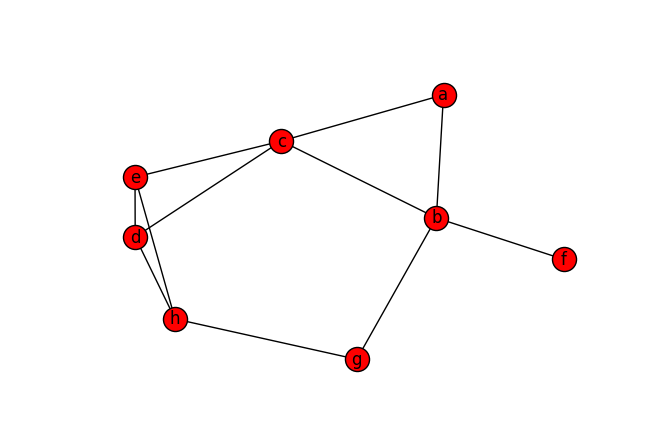

In [58]:
graphPlot(sampleGraph)

# <span style="color:green">Graph Traversal</span>

## <span style="color:blue">Breadth First search : </span>

#### helper function

In [19]:
def BFS(root,Graph):
    Tree = {}
    Discovered = {nodes : False for nodes in Graph.keys()}
    Discovered[root] = True
    Layers = {}
    Layers[0] = [root]
    i = 0
    while len(Layers[i]) != 0 :
        Layers[i+1] = []
        for node in Layers[i]:
            Tree[node] = []
            for child in Graph[node]:
                if Discovered[child]==False:
                    Tree[node].append(child)
                    Layers[i+1].append(child)
                    Discovered[child]=True
        i=i+1
    return Tree,Layers

#### creating a BFS graph


In [66]:
root = "a"  # creating the root on "a"
bfsTree,Layers = BFS(root,sampleGraph)

In [62]:
bfsTree

{'a': ['b', 'c'],
 'b': ['f', 'g'],
 'c': ['d', 'e'],
 'd': [],
 'e': [],
 'f': [],
 'g': ['h'],
 'h': []}

In [63]:
Layers

{0: ['a'], 1: ['b', 'c'], 2: ['f', 'g', 'd', 'e'], 3: ['h'], 4: []}

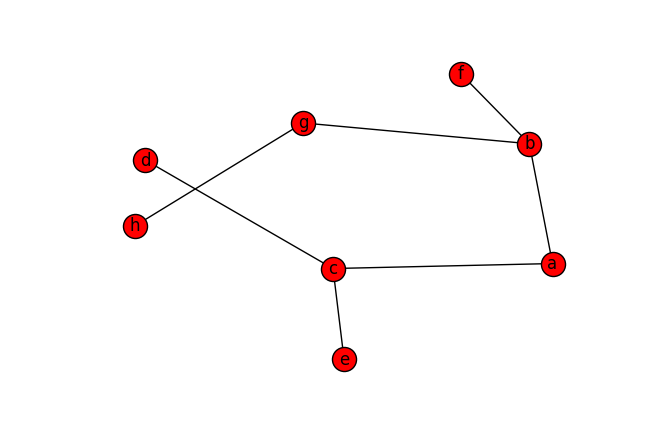

In [64]:
graphPlot(bfsTree)

## <span style="color:blue">Depth First Search - by recursion </span>

#### helper function

In [33]:
def DFS(u,discovered,Tree,Graph):
    discovered[u]= True
    Tree[u] =[]
    for node in Graph[u]:
        if discovered[node] == False :
            Tree[u].append(node)
            DFS(node,discovered,Tree,Graph)
    

In [36]:
def DFSWrapper(root,Graph):
    Tree = {}
    Discovered = {key:False for key in Graph.keys()}
    
    DFS(root,Discovered,Tree,Graph)
    return Tree
    
    
    

#### creating a DFS graph


In [41]:
root ="a" # creating the root of the graph at "a" node

dfsTree = DFSWrapper(root,sampleGraph)

In [42]:
dfsTree

{'a': ['b'],
 'b': ['c', 'f'],
 'c': ['d'],
 'd': ['e'],
 'e': ['h'],
 'f': [],
 'g': [],
 'h': ['g']}

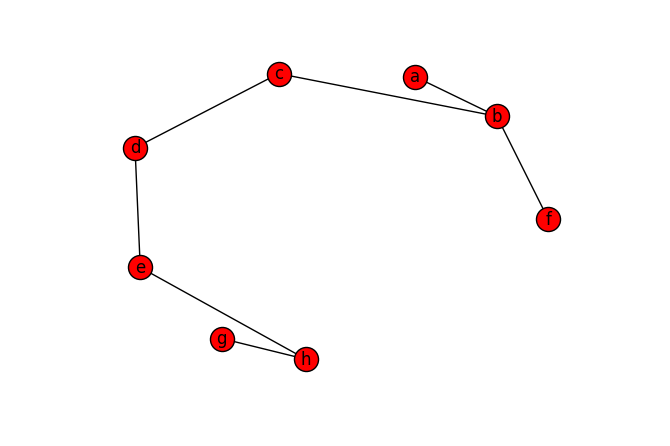

In [65]:
graphPlot(dfsTree)

# <span style="color:green">Problems in Graphs</span>

## <span style="color:blue">Checking for Bipartite graph:</span>

Bipartite graph is a kind of graph which can be split into two sets X and Y so that every edge of the graph has one end in X and one end in Y

**How to check?**   
* create a BFS tree
* Let us assume the root lies in the set X
* then all the nodes in the next layer must lie in the set Y
* then the next layer nodes must lie in the set X
* and so on

* thus to check for bipartite graph
    * Check for edges that are present in the graph between two nodes lying in the same layer of a BFS tree

#### Helper function 

In [88]:
def checkBipartite(graph):
    graphEdges = []
    for nodes in graph.keys():
        graphEdges.extend([(nodes,child) for child in graph[nodes]])
    
    # creating a BFS tree and finding nodes in the same layer
    # selecting any random root for the tree, in this we choose "a"
    root = "a"
    bfsTree,bfsLayers = BFS(root,graph)
    
    # creating edges of all nodes in the same layer
    layerEdges = []
    for layer in bfsLayers.keys():
        thisLayer = bfsLayers[layer]
        thisLayer = list(itertools.combinations(thisLayer,2))
        layerEdges.extend(thisLayer)
    
    # if any of the edges from the same layer edges is found in the actual graph edges,
    # then it is not a bipartite graph
    
    for edge in layerEdges:
        if edge in graphEdges:
            return False
    return True
    

#### calling the function for checking bipartite graph

In [89]:
checkBipartite(sampleGraph)

False